In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Readin the metadata ffrom th csv file
df = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv')
df.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [3]:
# Printing the Metadata details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [4]:
df.shape

(110, 18)

In [5]:
import glob 
data_map = []
for directory in glob.glob("../input/lgg-mri-segmentation/kaggle_3m/*"):
# directory here will return the 110 folders we are navigating 
# For example : Directory :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307
    try:
        dir_name = directory.split("/")[-1]
        # dir_name extracts the folder name from the directory. For the above example would return TCGA_DU_7010_19860307
        # print("Directory : ", directory , " Dir_name : ", dir_name)
        # For every file in the directory(we have 110 directories) we form the "absolute file path"
        # for the actual RGB image and the mask image.
        # Example for filename : CGA_DU_7010_19860307_56_mask.tif  and TCGA_DU_7010_19860307_56.tif
        # image path with be concatenation of directory and filename
        # Example :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif 
        # Example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif
        for filename in os.listdir(directory):
            image_path = directory + '/' + filename
            # data_map is one-to-one mapping of Directory name and the absolute file path of an RGB or mask file 
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/data.csv'


In [6]:
data_map[:5]

['TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif',
 'TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif',
 'TCGA_DU_7010_19860307']

In [7]:
new_df = pd.DataFrame({"patient_id" : data_map[::2],
                   "path" : data_map[1::2]})
new_df.head()

,patient_id,path
0,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...


In [8]:
# Printing the first 10 patient ID's and its file path
for i in range(10):
    print("Patinet Id : ", new_df.iloc[i]['patient_id'])
    print("Absolute File path : ", new_df.iloc[i]['path'])
    print("="*200)

Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_27.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_52.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCG

In [9]:
# More about str.contains in a Pandas Series can be found here : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
normal_images = new_df[~new_df['path'].str.contains("mask")]
mask_images = new_df[new_df['path'].str.contains("mask")]

In [10]:
# Sorting the Images and mask so as to form one-to-one correspondence
common_file_length = 84
# Any file with its absolute file path has minimum characters in the file name
# For example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_   has 84 characters

normal_img_file_length = 4
# Normal file has only .tif common at its end, hence the value(len(.tif)) equal to 4

mask_img_file_length = 9
# mask files has _mask.tif at their end making its length(len(_mask.tif)) equal to 9

# Data sorting
imgs = sorted(normal_images["path"].values, key=lambda x : int(x[common_file_length:-normal_img_file_length]))
masks = sorted(mask_images["path"].values, key=lambda x :  int(x[common_file_length:-mask_img_file_length]))

# x[common_file_length:-normal_img_file_length] is picking up the number stored after "TCGA_DU_7010_19860307_" and before ".tif" from a given Image x
# Same is happening w.r.t Mask Image

# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx])
print("\nPath to the Mask:", masks[idx])

Path to the Image: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_13.tif

Path to the Mask: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_13_mask.tif


In [11]:
# Now we need to create a DataFrame contains 4 columns
# 1. Patient ID
# 2. An RGB Image
# 3. It;s corresponding Mask Image
# 4. Mask Binary value : 0 and 1 depending on the image of the mask

import cv2

# Final dataframe
final_df = pd.DataFrame({"patient_id": normal_images.patient_id.values,
                         "image_path": imgs,
                         "mask_path": masks
                        })

# Creating the 3td column for our final df where if the entire mask image is black(0 i.e no tumor) then its value will be 0 else 1
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path)) # Checking for the maximum pixel value in the mask image
    if value > 0 :  # Non zero value then tumor is present in the mask image
        return 1
    else:           # Zero value means no tumor
        return 0
    
final_df['mask'] = final_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
final_df

,patient_id,image_path,mask_path,mask
0,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
1,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
2,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,0
3,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,0
4,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
...,...,...,...,...
3924,TCGA_DU_7306_19930512,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,0
3925,TCGA_DU_7306_19930512,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,0
3926,TCGA_DU_7306_19930512,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,0
3927,TCGA_DU_7306_19930512,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,0


In [12]:
# Visualization and EDA

final_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


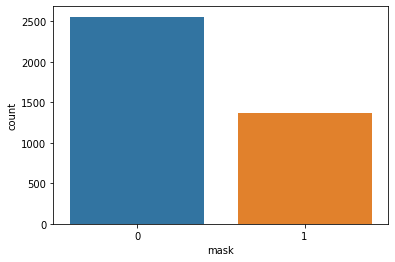

In [13]:
sns.countplot(final_df['mask'])
plt.show()

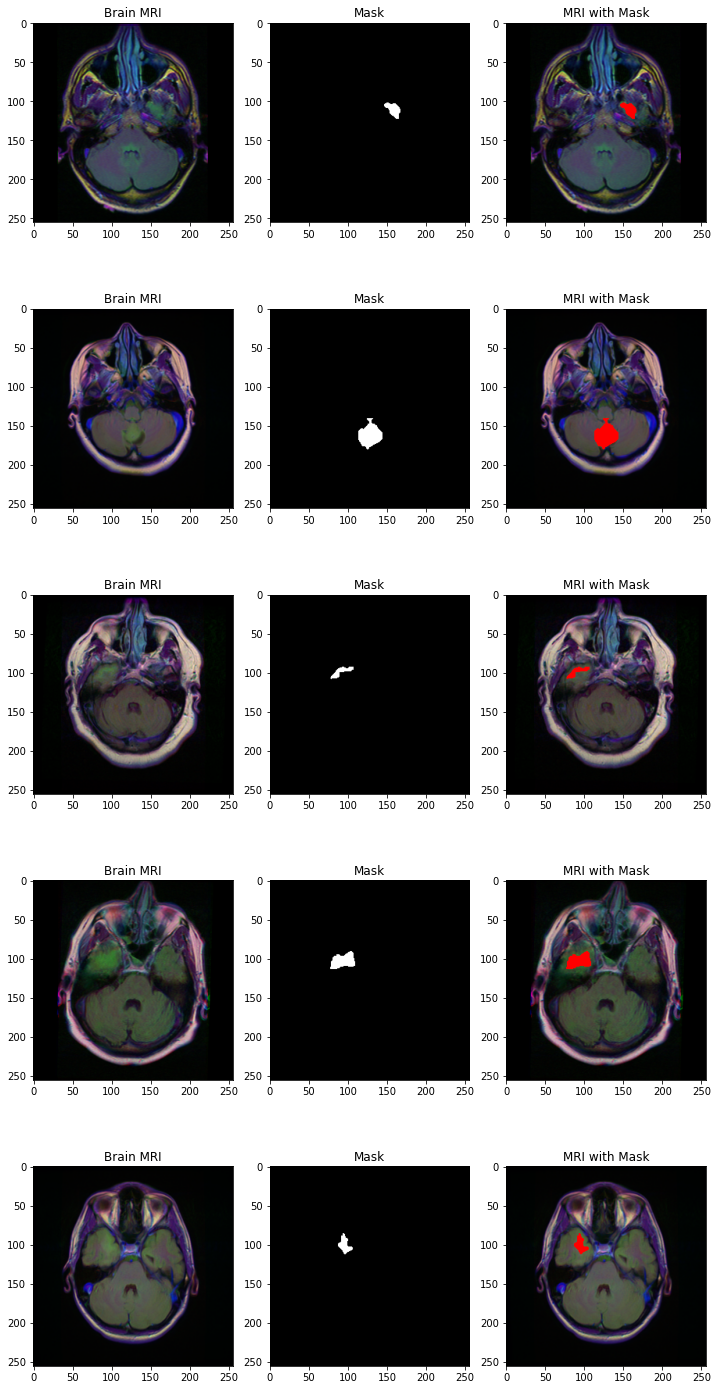

In [14]:
from skimage import io

count = 0
fig, axs = plt.subplots(5, 3, figsize = (10,20))

for i in range(len(final_df)):
    if final_df['mask'][i] ==1 and count < 5:
        img = io.imread(final_df.image_path[i])
        axs[count][0].title.set_text('Brain MRI')
        axs[count][0].imshow(img)
        
        mask = io.imread(final_df.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap = 'gray')
        
        # For the 3rd Image we will overlap the RGB image with the Mask Image in whh the while pixel will be converted into a Red color 
        # 3 channel pixel
        img[mask == 255] = (255, 0, 0)
        axs[count][2].title.set_text('MRI with Mask')
        axs[count][2].imshow(img)
        count+=1

fig.tight_layout()

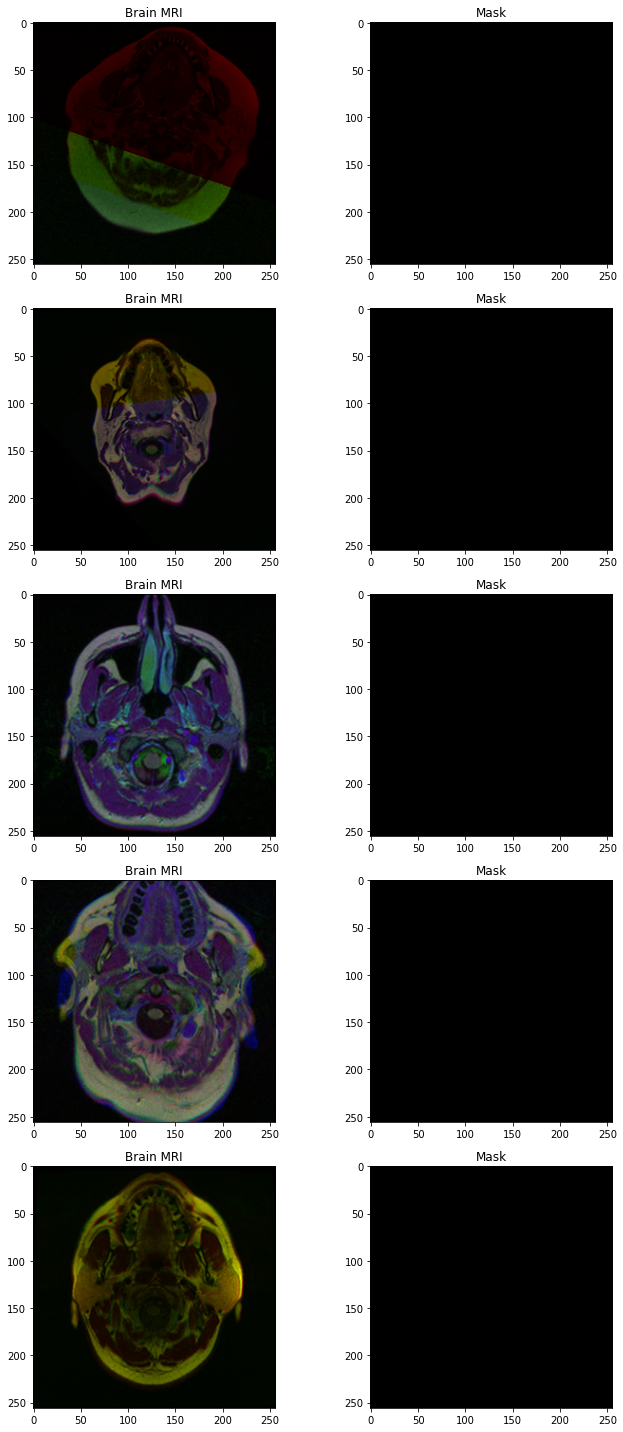

In [15]:
# Some Images without Tumor
count = 0
fig, axs = plt.subplots(5, 2, figsize = (10,20))

for i in range(len(final_df)):
    if final_df['mask'][i] ==0 and count < 5:
        img = io.imread(final_df.image_path[i])
        axs[count][0].title.set_text('Brain MRI')
        axs[count][0].imshow(img)
        
        mask = io.imread(final_df.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap = 'gray')
        count+=1

fig.tight_layout()

In [16]:
# Drop the Patient Id from the Dataframe as we don't need it
final_df_data = final_df.drop(columns = ['patient_id'])

# Converting the Mask column from Integer t oString Object
final_df_data['mask'] = final_df_data['mask'].apply(lambda x : str(x))
final_df_data.shape

(3929, 3)

In [17]:
final_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [18]:
final_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
1,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0
2,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,0
3,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,0
4,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,0


In [19]:
final_df_data.isnull().sum()

image_path    0
mask_path     0
mask          0
dtype: int64

In [20]:
# Splitting the Data into Train - Test
from sklearn.model_selection import train_test_split
train,test = train_test_split(final_df_data,test_size = 0.20)

In [21]:
print("Train Shape : ", train.shape)
print("Test Shape : ", test.shape)

Train Shape :  (3143, 3)
Test Shape :  (786, 3)


In [22]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator


# We will Image DataGeneratos for Train, Validation and Test
# These generators generate batches of tensor image data with real-time data augmentation.

# Creating the ImageDataGenerator Object
datagen = ImageDataGenerator(rescale = 1./255,
                             validation_split = 0.15)

In [23]:
train_datagen = datagen.flow_from_dataframe(
dataframe = train,
directory = "./",
x_col= 'image_path',
y_col = 'mask',
subset = "training",
shuffle = True,
batch_size = 16,
class_mode = "categorical",
target_size = (256,256))

validation_datagen = datagen.flow_from_dataframe(
dataframe = train,
directory = "./",
x_col= 'image_path',
y_col = 'mask',
subset = "validation",
shuffle = True,
batch_size = 16,
class_mode = "categorical",
target_size = (256,256))

Found 2672 validated image filenames belonging to 2 classes.
Found 471 validated image filenames belonging to 2 classes.


In [24]:
# Create Image Datagenerator for Test Data
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
dataframe = test,  # name of the Dataframe, source to pick the data
directory = './',  # directory where we will find the Image w.r.t Dataframe
x_col = "image_path", # Input Image
y_col = "mask",       # Output
batch_size = 16,      
shuffle = False,      # True then shuffle the data while passing into batches
class_mode = "categorical",  # 2D numpy array of one-hot encoded labels. Supports multi-label output.
target_size = (256,256))  # Size of the Input Image

Found 786 validated image filenames belonging to 2 classes.


In [25]:
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler

In [26]:
base_model = ResNet50(weights = "imagenet", include_top = False,input_tensor = Input(shape=(256,256,3)))
base_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [27]:
# Since we don't want to train the ResNet again we will freeze it thus making it inon-trainable
for layer in base_model.layers:
    layers.trainable = False

In [28]:
# We will add some more layers on top of ResNet and train them as per our data
outputs = base_model.output
outputs = AveragePooling2D(pool_size = (4,4))(outputs)
outputs = Flatten(name= 'flatten')(outputs)
outputs = Dense(256, activation = "relu")(outputs)
outputs = Dropout(0.3)(outputs)
outputs = Dense(256, activation = "relu")(outputs)
outputs = Dropout(0.3)(outputs)
outputs = Dense(256, activation = "relu")(outputs)
outputs = Dropout(0.3)(outputs)
outputs = Dense(2, activation = 'softmax')(outputs)

model = Model(inputs = base_model.input, outputs = outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [29]:
# Compile the Model categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',optimizer = "adam", metrics = ['accuracy'])

In [30]:
# Use Callback

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
checkpoint = ModelCheckpoint(filepath = 'resnet_weights.h5', verbose = 1, save_best_only = True)

In [31]:
# Fit the model
h = model.fit(
train_datagen,
steps_per_epoch = train_datagen.n // train_datagen.batch_size,
epochs = 50,
validation_data = validation_datagen,
validation_steps = validation_datagen.n // validation_datagen.batch_size,
callbacks = [earlystopping,checkpoint])

Epoch 1/50
167/167 [==============================] - 42s 180ms/step - loss: 1.0870 - accuracy: 0.6420 - val_loss: 2.7203 - val_accuracy: 0.6681

Epoch 00001: val_loss improved from inf to 2.72034, saving model to resnet_weights.h5
Epoch 2/50
167/167 [==============================] - 22s 134ms/step - loss: 0.5030 - accuracy: 0.7830 - val_loss: 6.0974 - val_accuracy: 0.6659

Epoch 00002: val_loss did not improve from 2.72034
Epoch 3/50
167/167 [==============================] - 22s 134ms/step - loss: 0.3703 - accuracy: 0.8447 - val_loss: 0.6364 - val_accuracy: 0.6681

Epoch 00003: val_loss improved from 2.72034 to 0.63637, saving model to resnet_weights.h5
Epoch 4/50
167/167 [==============================] - 23s 135ms/step - loss: 0.3155 - accuracy: 0.8763 - val_loss: 0.6324 - val_accuracy: 0.6659

Epoch 00004: val_loss improved from 0.63637 to 0.63240, saving model to resnet_weights.h5
Epoch 5/50
167/167 [==============================] - 22s 134ms/step - loss: 0.2947 - accuracy: 0.8

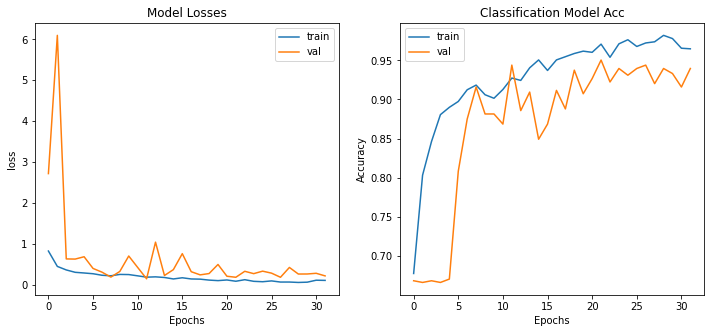

In [32]:
# Plots
plt.figure(figsize=(12,5)) # Make plots of size 12 X 5

plt.subplot(1,2,1)  # So there will 1 row have 2 values and in the 1st place plot the below plot of losses
plt.plot(h.history['loss']);  # Plot Training data loss
plt.plot(h.history['val_loss']); # Plot Validation data loss
plt.title("Model Losses");
plt.ylabel("loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)  # In the 2nd place plot train and validation accuracy
plt.plot(h.history['accuracy']);  # Plot Training data Accuracy
plt.plot(h.history['val_accuracy']); # Plot Validation data Accuracy
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [34]:
_,test_accuracy = model.evaluate(test_generator)
print("Accuracy on the Test Data : ", test_accuracy * 100)

50/50 [==============================] - 3s 53ms/step - loss: 0.2661 - accuracy: 0.9224
Accuracy on the Test Data :  92.23918318748474


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       508
           1       0.95      0.82      0.88       278

    accuracy                           0.92       786
   macro avg       0.93      0.90      0.91       786
weighted avg       0.92      0.92      0.92       786



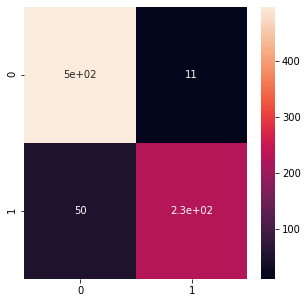

In [36]:
prediction = model.predict(test_generator)

pred = np.argmax(prediction, axis=1)
#pred = np.asarray(pred).astype('str')
original = np.asarray(test['mask']).astype('int')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(original, pred)

report = classification_report(original, pred, labels = [0,1])
print(report)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True);